<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020_private/blob/main/cwiczenia_2a_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Predicting house prices: a regression example**

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.



In [165]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt



**1-dimensional data**

In [166]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 100
low=0
high=12
error=10

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(100,) (100,)


Plot the function and data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

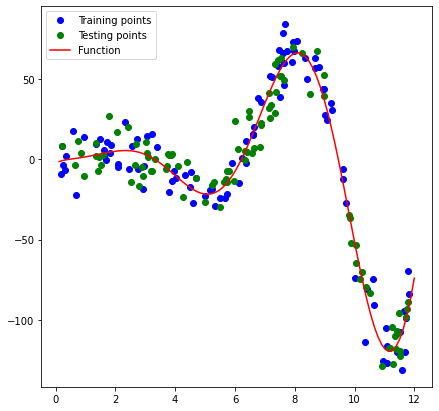

In [167]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show


**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


In [168]:
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

XX_test_n = XX_test - mean
XX_test_n /= std

meany = yy_train.mean(axis=0)
yy_train_n = yy_train - meany
stdy = yy_train_n.std(axis=0)
yy_train_n /= stdy

yy_test_n = yy_test - meany
yy_test_n /= stdy



#XX_train_n = XX_train_n.reshape((len(XX_train_n),1))
#XX_test_n  = XX_test_n.reshape((len(XX_test_n),1))


Define neural network

In [169]:
model0 = Sequential(name='network')
model0.add(Dense(64, input_shape = (1,), activation = 'relu'))
model0.add(Dropout(0.02))
model0.add(Dense(64, input_shape = (1,), activation = 'relu'))
model0.add(Dropout(0.02))
model0.add(Dense(1,activation='linear'))

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 64)                128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


Train neural network

For regression problems, mean squared error (MSE) is often employed




In [170]:
#sgd0 = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer


model0.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed
history = model0.fit(XX_train_n, yy_train_n, batch_size = 128, epochs = 2000, validation_data=(XX_test_n, yy_test_n), verbose = 1 )

Epoch 1/2000
1/1 [==============================] - 0s 103ms/step - loss: 1.1441 - mse: 1.1441 - val_loss: 1.1260 - val_mse: 1.1260
Epoch 2/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.1326 - mse: 1.1326 - val_loss: 1.0781 - val_mse: 1.0781
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.1004 - mse: 1.1004 - val_loss: 1.0341 - val_mse: 1.0341
Epoch 4/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.0641 - mse: 1.0641 - val_loss: 0.9934 - val_mse: 0.9934
Epoch 5/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.0308 - mse: 1.0308 - val_loss: 0.9567 - val_mse: 0.9567
Epoch 6/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.0044 - mse: 1.0044 - val_loss: 0.9231 - val_mse: 0.9231
Epoch 7/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.9898 - mse: 0.9898 - val_loss: 0.8920 - val_mse: 0.8920
Epoch 8/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.9667 - 

Plot loss

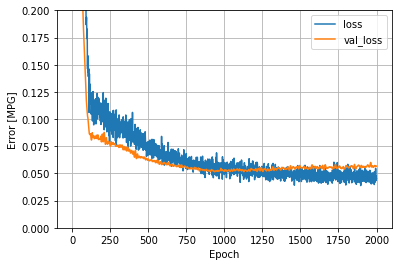

In [171]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


Evaluate neural network

In [172]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.0567 - mse: 0.0567
loss test data:  0.056734029203653336
mse test data:  0.056734029203653336
4/4 [==============================] - 0s 3ms/step - loss: 0.0415 - mse: 0.0415
loss train data:  0.041536346077919006
mse train data:  0.041536346077919006


Plot results

<function matplotlib.pyplot.show>

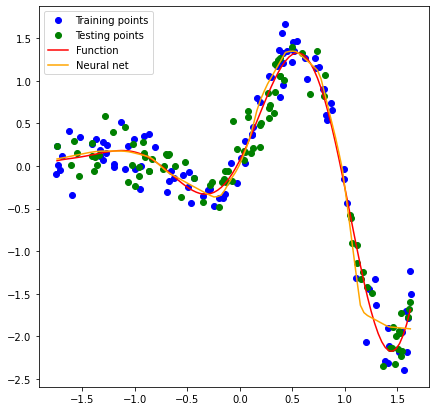

In [173]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-meany)/stdy,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')

#plt.plot(XX_train_n, model0.predict(XX_train_n), 'o',  color='red', label='NN')

plt.legend()


plt.show

**The Boston Housing Price dataset**

We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

In [174]:

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()



**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:


In [179]:
mean = X_train.mean(axis=0)
X_train_n = X_train-mean
std = X_train_n.std(axis=0)
X_train_n /= std

X_test_n = X_test - mean
X_test_n /= std

meany = y_train.mean(axis=0)
y_train_n = y_train - meany
stdy = y_train_n.std(axis=0)
y_train_n /= stdy

y_test_n = y_test - meany
y_test_n /= stdy



#XX_train_n = XX_train_n.reshape((len(XX_train_n),1))
#XX_test_n  = XX_test_n.reshape((len(XX_test_n),1))


In [191]:

model = Sequential()

# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(8, input_shape = (X_train.shape[1],)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('relu'))
#model.add(Dropout(0.01))
model.add(Dense(8))                         # Hidden layer => only output dimension should be designated
model.add(Activation('relu'))
#model.add(Dropout(0.01))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem


#sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed
history = model.fit(X_train_n, y_train_n, batch_size = 50, epochs = 200, verbose = 1, validation_data=(X_test_n,y_test_n))



Epoch 1/200
9/9 [==============================] - 0s 14ms/step - loss: 1.3220 - mse: 1.3220 - val_loss: 1.3613 - val_mse: 1.3613
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1983 - mse: 1.1983 - val_loss: 1.2390 - val_mse: 1.2390
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1089 - mse: 1.1089 - val_loss: 1.1489 - val_mse: 1.1489
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0395 - mse: 1.0395 - val_loss: 1.0736 - val_mse: 1.0736
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9754 - mse: 0.9754 - val_loss: 0.9972 - val_mse: 0.9972
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9152 - mse: 0.9152 - val_loss: 0.9046 - val_mse: 0.9046
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.8545 - mse: 0.8545 - val_loss: 0.8584 - val_mse: 0.8584
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.8151 - mse: 0.8151 - va

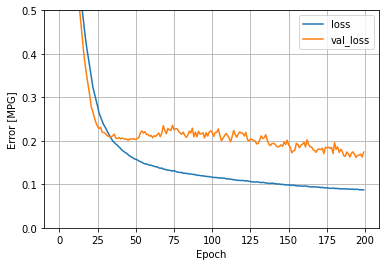

In [192]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


In [182]:
results = model.evaluate(X_test_n, y_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model.evaluate(X_train_n, y_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.2560 - mse: 0.2560
loss test data:  0.25595352053642273
mse test data:  0.25595352053642273
13/13 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
loss train data:  0.10794869065284729
mse train data:  0.10794869065284729
